<a href="https://colab.research.google.com/github/Sevenc1over/AI-class/blob/main/5%EC%A3%BC%EC%B0%A8/%ED%8C%8C%EC%9D%B4%ED%86%A0%EC%B9%98_%EB%94%AE%EB%9F%AC%EB%8B%9D2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

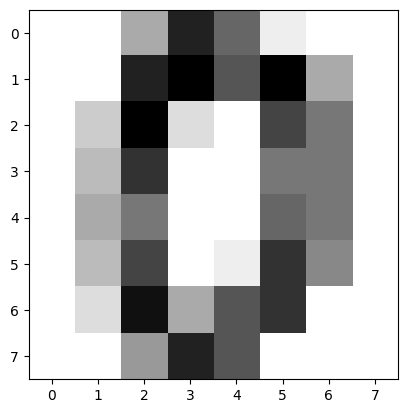

In [14]:
#데이터 불러오기
import matplotlib.pyplot as plt
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split

digits = datasets.load_digits()
plt.imshow(digits.images[0], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [15]:
#딥러닝을 위해서 Numpy로 전환 (딥러닝은 1차원 벡터화가 필수적으로 필요한것이 아니기에 2차원 상태에서 Numpy를 실행했습니다.)
digitsNumpy = digits.data


In [23]:
#Numpy로 만든 데이터확인
print(digitsNumpy, "\n\n shape : 8x8 형태에기에 64가 나옵니다. \n",digitsNumpy.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]] 

 shape 
 (1797, 64)


In [28]:
#위 데이터를 테스트, 훈련 데이터로 나누는 과정
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digitsNumpy, datasets.load_digits().target, test_size=0.2)

In [40]:
#모델 생성
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam


model = Sequential()

model.add(Dense(8,input_shape=(64,),activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(30,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy']) # Changed learning_rate and loss

model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │           310 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,030 (7.93 KB)

 Trainable params: 2,030 (7.93 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
history=model.fit(x=X_train, y=y_train, epochs=30, batch_size=32,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)

Epoch 1/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9885 - loss: 0.0368 - val_accuracy: 0.9500 - val_loss: 0.1718
Epoch 2/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9860 - loss: 0.0431 - val_accuracy: 0.9528 - val_loss: 0.1784
Epoch 3/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9923 - loss: 0.0273 - val_accuracy: 0.9500 - val_loss: 0.1712
Epoch 4/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9922 - loss: 0.0328 - val_accuracy: 0.9528 - val_loss: 0.1756
Epoch 5/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9934 - loss: 0.0272 - val_accuracy: 0.9500 - val_loss: 0.1840
Epoch 6/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9971 - loss: 0.0241 - val_accuracy: 0.9611 - val_loss: 0.1639
Epoch 7/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9966 - loss: 0.0236 - val_accuracy: 0.9556 - val_loss: 0.1719
Epoch 8/30
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9980 - loss: 0.0223 - val_accuracy: 0.9639 - val_loss

In [49]:
import numpy as np
from sklearn.metrics import accuracy_score

train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

print("최종 훈련 정확도:", train_accuracy[-1])
print("최종 검증 정확도:", val_accuracy[-1])

y_pred_classes = np.argmax(y_pred, axis=1)

test_accuracy = accuracy_score(y_test, y_pred_classes)

print("테스트 세트 최종 정확도:", test_accuracy)

최종 훈련 정확도: 1.0
최종 검증 정확도: 0.9611111283302307
테스트 세트 최종 정확도: 0.9611111111111111


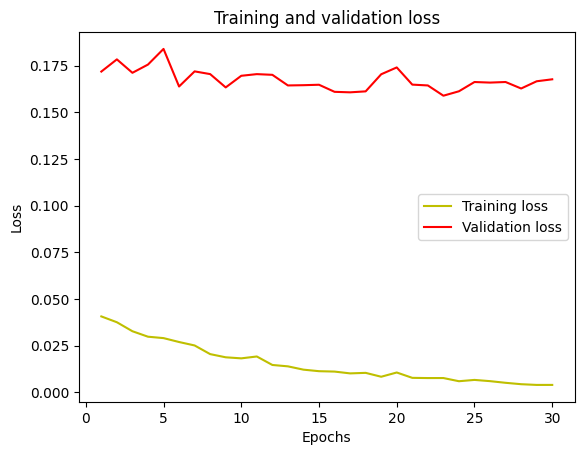

In [50]:
import matplotlib.pyplot as plt

loss =history.history['loss']
val_loss =history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

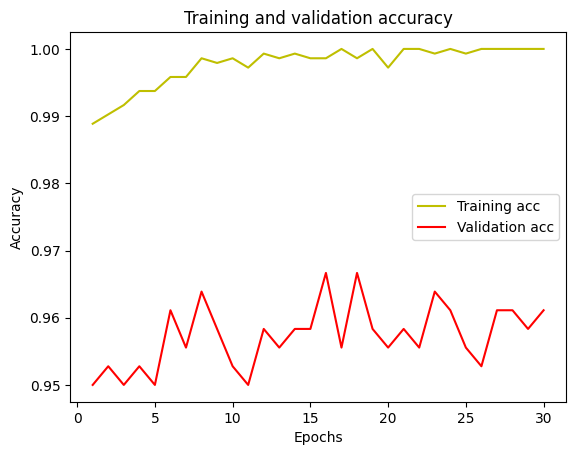

In [51]:
acc =history.history['accuracy']
val_acc =history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()